In [1]:
import numpy
from matplotlib import pyplot
%matplotlib inline

In [2]:
# Set parameters
Lx = 0.01
Ly = 0.01
nx = 21
ny = 21
dx = Lx / (nx - 1)
dy = Ly / (ny - 1)
alpha = 1e-4

x = numpy.linspace(0.0, Lx, num=nx)
y = numpy.linspace(0.0, Ly, num=ny)

# Initial conditions
T0 = 20.0 * numpy.ones((ny, nx))
T0[0, :] = 100.0
T0[:, 0] = 100.0

In [3]:
def ftcs(T0, nt, dt, dx, dy, alpha):
    T = T0.copy()
    sigma_x = alpha * dt / dx**2
    sigma_y = alpha * dt / dy**2
    I = int(nx/2)
    J = int(ny/2)
    for n in range(nt):
        T[1:-1, 1:-1] = T[1:-1, 1:-1] + sigma_x * (T[1:-1, :-2] - 2 * T[1:-1, 1:-1] + T[1:-1, 2:]) + \
                                        sigma_y * (T[:-2, 1:-1] - 2 * T[1:-1, 1:-1] + T[2:, 1:-1])
        T[0, :] = 100.0      #Bottom
        T[:, 0] = 100.0      #Left
        T[-1, :] = T[-2, :]  #Top
        T[:, -1] = T[:, -2]  #Right
        if T[J, I] >= 70.0:
            break
    print('Time step {}; temperature at center is {} C'.format (n, T[J, I])) 
    return T

In [4]:
sigma = 0.5
dt = sigma / ((1/dx**2 + 1/dy**2) * alpha)
nt = 500

In [5]:
T = ftcs(T0, nt, dt, dx, dy, alpha)

Time step 255; temperature at center is 70.021382940767 C


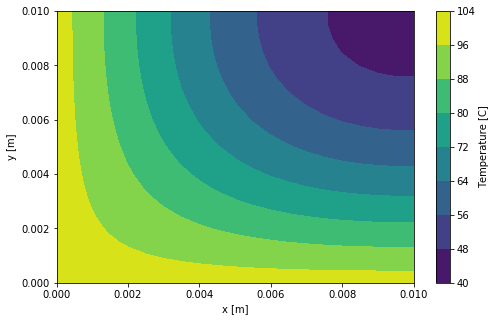

In [6]:
pyplot.figure(figsize=(8.0, 5.0))
pyplot.xlabel('x [m]')
pyplot.ylabel('y [m]')
contf = pyplot.contourf(x, y, T)
cbar = pyplot.colorbar(contf)
cbar.set_label('Temperature [C]')